## Application of Week 2  - Linear Models - Classification

by Haifa Altlili

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/haifamohamed/opt/anaconda3/envs/haifaenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Hinge Loss**

$Loss_{h} (X, y, \theta) = \max (1-y*(\theta.X) , 0)$

Where $X$ = [1,x] is the feature vector

y is the true label
 $\theta$ is the weight vector including the offset parameter

In [2]:
def hinge_loss_one_step(feature_vector, label, theta_vector):
    """
    This function calculates the hinge loss on a single data point
    Arguments:
    feature_vector: numpy array describing the data point
    label: the real classification value of the data point
    Theta and theta_0 describe the linear classifier
    
    Return:
    The hinge loss value
    hinge_loss(z) = 0 if z >= 1
    hinge_loss(z) = 1 - z if z < 1s
    z = label*(theta.feature_vector + theta_0) (agreement)
    
    theta_vector includes the offset parameter theta_0 = [theta_0, theta]
    feature_vector = [1, X]
    """
    
    return np.max(1 - label*(theta_vector.dot(feature_vector)), 0)

**TrainLoss Formula**

$TrainLoss(\theta) = (1/|Dtrain|)*\sum \limits_{(X,y)}^{} hingLoss(X,y,\theta)$

where $\theta$ is the weight vector including the bias term (offset parameter)

$X$ is the feature vector = [1, x]

Dtrain is the size of the training set. If we have n samples then Dtrain = n

In [3]:
def train_loss(feature_matrix, labels, theta_vector):
    """
    D = dimension of feature_matrix
    TrainLoss = (1/D)*sum(hinge_loss_one_step(feature_vector, label, theta_vector))
    feature_matrix dimension = nx(d+1)
    feature_vector dimension = (d+1)x1
    theta_vector dimension = (d+1)x1
    labels dimesion = nx1
    
    d+1 becuase we're additing a column of ones to the feature_matrix and that's becuase we are including the offset parameter theta_0
    
    """
    
    N, D = feature_matrix.shape
    train_loss = 0
    
    for i in range(N):
        train_loss += hinge_loss_one_step(feature_matrix[:,i], labels[i], theta_vector)
        
    return train_loss/N
    
    

**Gradient of the hinge loss**

$Gradient(X, y, \theta) = -X*y$ **if** $1 - (\theta.X)*y > 0$ 

In [4]:
def hinge_loss_gradient(feature_vector, label, theta_vector):
    """
    Calculates the gradient of the hinge loss
    """
    if 1 - (theta_vector.dot(feature_vector))*label > 0:
        return -feature_vector*label
    else:
        return np.zeros(len(feature_vector))

In [5]:
def train_loss_gradient(feature_matrix, labels, theta_vector):
    """
    calculates the gradient of the train_loss
    """
    N, D = feature_matrix.shape
    train_loss_gradient = np.zeros(D)
    for i in range(N):
        train_loss_gradient += hinge_loss_gradient(feature_matrix[i], labels[i], theta_vector)
    
    return train_loss_gradient/N
    

**Implementing Gradient Descent**

In [6]:
def gradient_descent(feature_matrix, labels, T, eta, lambda_):
    """
    This function implements gradient descent algorithm
    feature_matrix \: [1, X] where X represents the samples
    labels: True target values
    T: number of epochs
    eta: learning rate
    lambda_: reguslarization coefficient
    """
    N, D = feature_matrix.shape
    # Initialize theta_vector
    theta_vector = np.zeros(D)
    for t in range(T):
        theta_vector = theta_vector - eta*(train_loss_gradient(feature_matrix, labels, theta_vector) + lambda_*theta_vector)
        #print(f'theta: {theta_vector} and epoch: {t}')
    return theta_vector

In [7]:
def predict(features, theta_vec):
    """
    theta_vec is the optimized theta after applying the gradient descent algorithm
    """
    N, D = features.shape
    y_pred = np.zeros(N)
    for i in range(N):
        y_pred[i] = np.sign(theta_vec.dot(features[i]))
    return y_pred

In [8]:
def linear_classifier_accuracy(targets, predictions):
    """
    returns the accuracy rate
    """
    return np.mean(targets == predictions)

* I'll apply the gradient descent of the heart_disease data. 
* The data is from kaggle: https://www.kaggle.com/datasets/zeeshanmulla/heart-disease-dataset

**Dataset features**
* age = age in years
* sex = (1 = male; 0 = female)
* cp= chest pain type
* trestbps= resting blood pressure (in mm Hg on admission to the hospital)
* chol = serum cholestoral in mg/dl
* fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg = resting electrocardiographic results
* thalach = maximum heart rate achieved
* exang = exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target = 1 or 0


In [9]:
dataset = pd.read_csv('heart-2.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
dataset.shape

(303, 14)

In [14]:
dataset.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:>

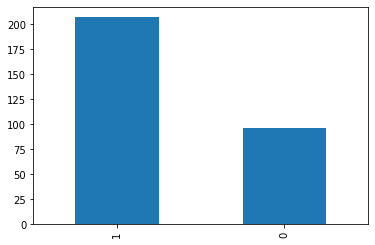

In [15]:
dataset.sex.value_counts().plot(kind='bar')

In [16]:
pd.crosstab(dataset.sex, dataset.target)

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:>

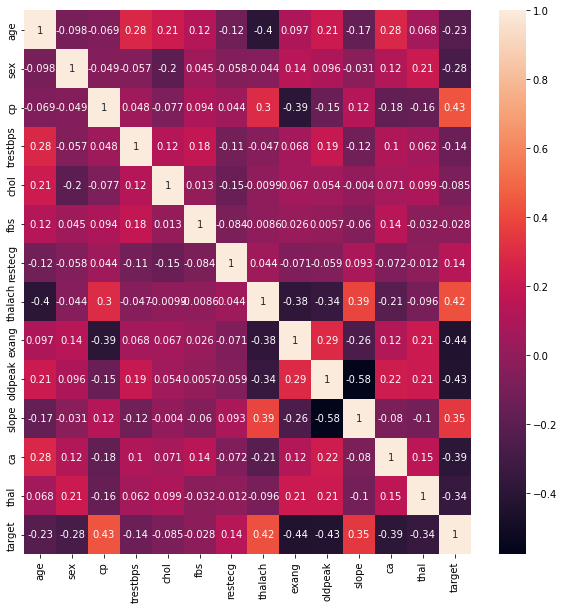

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

In [18]:
# split the feature matrix and the targets
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [22]:
training_feature_matrix = np.array(x_train)
training_labels = np.array(y_train)

In [23]:
training_feature_matrix.shape, training_labels.shape

((242, 13), (242,))

In [24]:
# Add a column of ones to the feature matrix

N = training_feature_matrix.shape[0]
ones_vec = np.ones(N).reshape((N, 1))

training_matrix = np.hstack((ones_vec, training_feature_matrix))
training_matrix.shape

(242, 14)

In [25]:
# convert the targets to -1 and 1 instaed of 0 and 1
for i in range(len(training_labels)):
    if training_labels[i] == 0:
        training_labels[i] = -1

In [26]:
training_labels[:10]

array([ 1,  1,  1, -1,  1,  1, -1,  1, -1,  1])

Text(0, 0.5, 'Accuracy')

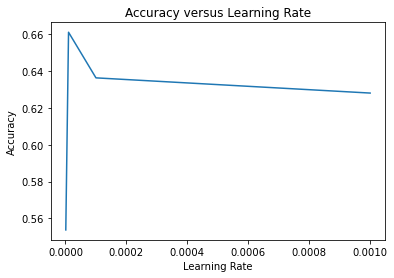

In [27]:
learning_rates = [0.001, 0.0001, 0.00001, 0.000001]
accuracies = []
lambda_ = 0.05
epochs = 1000

for rate in learning_rates:
    optimized_theta = gradient_descent(training_matrix, training_labels, epochs, rate, lambda_)
    y_pred_train = predict(training_matrix, optimized_theta)
    accuracy = linear_classifier_accuracy(y_pred_train, training_labels)
    accuracies.append(accuracy)

plt.plot(learning_rates, accuracies)
plt.title('Accuracy versus Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

In [28]:
theta_vec = gradient_descent(training_matrix, training_labels, 1000, 0.00001, 0.05)
print(theta_vec)

[-8.22990037e-05 -6.82228577e-03 -1.39200867e-03  3.75446827e-03
 -1.60652444e-02 -6.50847010e-03  8.15096718e-05  5.32955675e-04
  2.96887372e-02 -1.76503849e-03 -3.47637500e-03  1.34392750e-03
 -2.68779336e-03 -1.50611430e-03]


In [29]:
y_pred_train = predict(training_matrix, theta_vec)
accuracy = linear_classifier_accuracy(y_pred_train, training_labels)
print(f' Training Accuracy: {accuracy}')

 Training Accuracy: 0.6611570247933884


**Let's evaluate these results on the test set**

In [30]:
# Add a column of ones to the test set

test_feature_matrix = np.array(x_test)
test_labels = np.array(y_test)


N = test_feature_matrix.shape[0]
ones_vec2 = np.ones(N).reshape((N, 1))

test_matrix = np.hstack((ones_vec2, test_feature_matrix))
test_matrix.shape

(61, 14)

In [31]:
for j in range(len(test_labels)):
    if test_labels[j] == 0:
        test_labels[j] = -1
test_labels[:10]

array([-1,  1, -1, -1, -1, -1, -1,  1, -1,  1])

In [32]:
y_pred_test = predict(test_matrix, theta_vec)
test_accuracy = linear_classifier_accuracy(y_pred_test, test_labels)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.6229508196721312
